# Import Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [5]:
df.drop(columns=['Unnamed: 7', 'Unnamed: 8'], inplace=True)
df.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Output (S)  12001 non-null  int64  
 1   Ia          12001 non-null  float64
 2   Ib          12001 non-null  float64
 3   Ic          12001 non-null  float64
 4   Va          12001 non-null  float64
 5   Vb          12001 non-null  float64
 6   Vc          12001 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 656.4 KB


In [7]:
print(f"The Detect Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The Detect Dataset has 12001 rows and 7 columns.


In [8]:
df.describe()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
count,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000
mean,0.457962,6.709369,-26.557793,22.353043,0.010517,-0.015498,0.004980
std,0.498250,377.158470,357.458613,302.052809,0.346221,0.357644,0.349272
min,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.659921,-0.612709
25%,0.000000,-64.348986,-51.421937,-54.562257,-0.237610,-0.313721,-0.278951
50%,0.000000,-3.239788,4.711283,-0.399419,0.002465,-0.007192,0.008381
75%,1.000000,53.823453,69.637787,45.274542,0.285078,0.248681,0.289681
max,1.000000,885.738571,889.868884,901.274261,0.609864,0.627875,0.608243


In [9]:
df.isna().sum()

Output (S)    0
Ia            0
Ib            0
Ic            0
Va            0
Vb            0
Vc            0
dtype: int64

In [14]:
df['Output (S)'].value_counts()

Output (S)
0    6505
1    5496
Name: count, dtype: int64

There are no null values in out Dataset

## Converting PU into Real Time Values

In [11]:
for i in ['Va', 'Vb', 'Vc']:
    df[i] = df[i]*11000
    
df.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
0,0,-170.472196,9.219613,161.252583,6.593290e+06,-7259.130241,6659.740208
1,0,-122.235754,6.168667,116.067087,1.234200e+07,-6914.727017,5788.217479
2,0,-90.161474,3.813632,86.347841,1.706409e+07,-6658.045449,5106.764641
3,0,-79.904916,2.398803,77.506112,1.890897e+07,-6624.588641,4905.591614
4,0,-63.885255,0.590667,63.294587,2.183463e+07,-6506.515664,4521.549351


In [12]:
X = df.drop(columns=['Output (S)'])
y = df['Output (S)']

X.head()

,Ia,Ib,Ic,Va,Vb,Vc
0,-170.472196,9.219613,161.252583,6.593290e+06,-7259.130241,6659.740208
1,-122.235754,6.168667,116.067087,1.234200e+07,-6914.727017,5788.217479
2,-90.161474,3.813632,86.347841,1.706409e+07,-6658.045449,5106.764641
3,-79.904916,2.398803,77.506112,1.890897e+07,-6624.588641,4905.591614
4,-63.885255,0.590667,63.294587,2.183463e+07,-6506.515664,4521.549351


In [13]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Output (S), dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [16]:
normaliser = MinMaxScaler()

X_train = normaliser.fit_transform(X_train)
X_test = normaliser.transform(X_test)

In [19]:
pd.DataFrame(X_train, columns=X.columns).describe()

,Ia,Ib,Ic,Va,Vb,Vc
count,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000
mean,0.503681,0.487149,0.506320,0.514136,0.501619,0.503455
std,0.212950,0.200688,0.169462,0.281051,0.278136,0.285437
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.463239,0.473914,0.464007,0.316161,0.268840,0.271538
50%,0.497810,0.504892,0.494295,0.507091,0.506999,0.507927
75%,0.529833,0.541623,0.520019,0.737094,0.707998,0.735218
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## SVM Model

Score: 0.9950000000000001


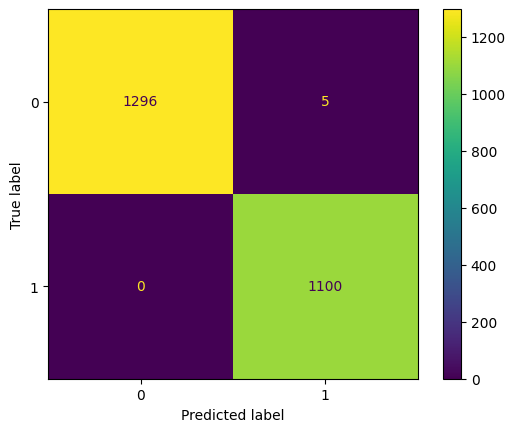

In [34]:
sv = SVC(C=1000)

sv.fit(X_train,y_train)
scores = cross_val_score(sv, X_test, y_test, cv=10)
svm_pred = sv.predict(X_test)
print("Score:", np.mean(scores))

svm_cm = confusion_matrix(y_test, svm_pred, labels = sv.classes_)
disp  = ConfusionMatrixDisplay(confusion_matrix = svm_cm, 
                               display_labels = sv.classes_)
disp.plot()
plt.show()

## Decision Tree Model

Score: 0.9891701244813278


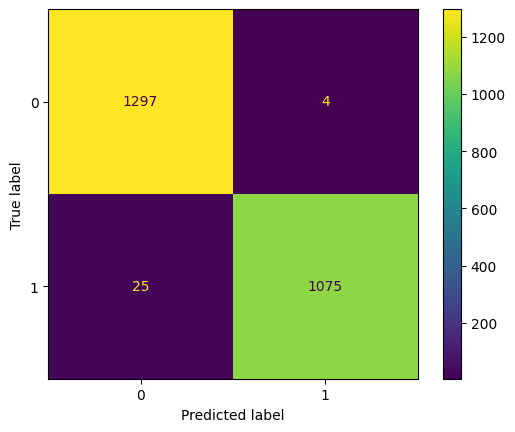

In [35]:
dtc = DecisionTreeClassifier(criterion='gini',ccp_alpha=0.0012)

dtc.fit(X_train,y_train)
scores_dtc = cross_val_score(dtc, X_test, y_test, cv=10)
dtc_pred = dtc.predict(X_test)
print("Score:", np.mean(scores_dtc))

dtc_cm = confusion_matrix(y_test, dtc_pred, labels = dtc.classes_)
disp_dtc  = ConfusionMatrixDisplay(confusion_matrix = dtc_cm, 
                               display_labels = dtc.classes_)
disp_dtc.plot()
plt.show()